In [1]:
!pip install deep-translator
!pip install transformers

     |████████████████████████████████| 97 kB 5.3 MB/s 
     |████████████████████████████████| 97 kB 6.0 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.3 which is incompatible.
     |████████████████████████████████| 3.5 MB 8.5 MB/s 
     |████████████████████████████████| 6.8 MB 26.3 MB/s 
     |████████████████████████████████| 895 kB 4.1 MB/s 
     |████████████████████████████████| 596 kB 38.6 MB/s 
     |████████████████████████████████| 67 kB 2.6 MB/s 
  Attempt

In [2]:
import json
def load_json(load_path):
    # read from path
    with open(load_path) as json_file:
        data = json.load(json_file)
    return data

In [27]:
import pandas as pd

d1 = load_json("/content/drive/MyDrive/dmr/data/dutch1.json")
d2 = load_json("/content/drive/MyDrive/dmr/data/dutch2.json")
d3 = load_json("/content/drive/MyDrive/dmr/data/dutch3.json")
d4 = load_json("/content/drive/MyDrive/dmr/data/dutch4.json")
d_total = d1+d2+d3+d4
#del d1, d2, d3, d4

In [28]:
# check each content if there is different key

class checkData:
    """Checks if dataframe has different keys

    Return:
    Bool and log list
    """
    def __init__(self):
        self.d1 = d1
        self.d2 = d2
        self.d3 = d3
        self.d4 = d4
    
    def check_consistent(self):
        logs = []

        # check for d1
        d1 = self.d1
        d1_keys = d1[0].keys()
        for index, item in enumerate(d1):
            if sorted(item.keys()) != sorted(d1_keys):
                logs.append(f"d1 data has different key on {str(index)}")

        # check for d2
        d2 = self.d2
        d2_keys = d2[0].keys()
        for index, item in enumerate(d2):
            if sorted(item.keys()) != sorted(d2_keys):
                logs.append(f"d2 data has different key on {str(index)}")

        # check for d3
        d3 = self.d3
        d3_keys = d3[0].keys()
        for index, item in enumerate(d3):
            if sorted(item.keys()) != sorted(d3_keys):
                logs.append(f"d3 data has different key on {str(index)}")

        # check for d4
        d4 = self.d4
        d4_keys = d4[0].keys()
        for index, item in enumerate(d4):
            if set(item.keys()) != set(d4_keys):
                logs.append(f"d4 data has different key on {str(index)}")

        if len(logs) == 0:
            return True, []
        else:
            return False, logs

check_data = checkData()
is_consistent, logs = check_data.check_consistent()
if not is_consistent:
    print("Has fault! check logs")
else:
    print("Everything is ok")

Has fault! check logs


In [29]:
len(logs)

1927

In [30]:
sorted(d4[0].keys()) == sorted(d4[330].keys())

False

In [31]:
print(list(d4[0].keys()))
print(list(d4[330].keys()))

['url', 'posted_at', 'source_url', 'language', 'provider', 'source', 'source_type', 'author_location', 'relevance_2', 'author_username', 'br_Country', 'lang', 'author_name', 'content', 'who_curated', 'batch_name', 'tags', 'id', 'author_url']
['sentiment', 'url', 'posted_at', 'source_url', 'relevance_2', 'who_curated', 'provider', 'source', 'source_type', 'author_location', 'author_url', 'author_username', 'br_Country', 'lang', 'author_name', 'content', 'batch_name', 'language', 'id', 'tags']


In [32]:
sentiment = []
content = []
# concatenate data
for data in d_total:
    try:
        sentiment.append(data['sentiment'])
        content.append(data['content'])
    except KeyError:
        pass

df = pd.DataFrame()
df['sentiment'] = sentiment
df['content'] = content

In [33]:
# get only classified data
train_sentiment, train_content = [], []
for i, sent in enumerate(df['sentiment']):
    if len(sent) > 0:
        content = df.iloc[i]['content']
        train_content.append(content)
        train_sentiment.append(sent)

train_set = pd.DataFrame()
train_set['content'] = train_content
train_set['sentiment'] = train_sentiment
del df

In [34]:
train_set = train_set.drop_duplicates()
train_set.value_counts("sentiment")

sentiment
neutral     2122
positive     730
negative     176
not sure     146
dtype: int64

In [35]:
# clean content
import re
class CleanText:
    #  cleaning e-mails
    def clean_email(self, content):
        reg_email='\S*@\S*\s?'
        pattern_email = re.compile(reg_email)
        content = pattern_email.sub('',content)
        return content

    def remove_emoji(self, string):
        emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', string)

    def clean_content(self, text):
        text = self.clean_email(text)
        text = re.sub("@[A-Za-z0-9_]+"," ", text)
        text = re.sub("#[A-Za-z0-9_]+"," ", text)
        text = re.sub(r'http\S+', ' ', text)
        text = re.sub(r'www\S+', ' ', text)
        text = self.remove_emoji(text)
        text = text.replace('RT', ' ')
        text = text.replace('\n', ' ')
        text = text.replace('\t', ' ')


        filtered_sentence = []
        for word in text.split(" "):
            if len(word) > 1:
                word = word.strip()
                filtered_sentence.append(word)
        
        text = ' '.join(filtered_sentence)
        return text

cleaner = CleanText()

cleaning = lambda x: cleaner.clean_content(x)
train_set['clean_content'] = train_set['content'].apply(cleaning)

# remove not sure
train_set = train_set[train_set['sentiment']!='not sure']
train_set

,content,sentiment,clean_content
0,Een dorsmachine wordt gebruikt voor het dorsen...,neutral,Een dorsmachine wordt gebruikt voor het dorsen...
1,"De plant groeit vanuit een flinke bol,eerst on...",neutral,"De plant groeit vanuit een flinke bol,eerst on..."
2,"Als de temperatuur boven het vriespunt komt, k...",neutral,"Als de temperatuur boven het vriespunt komt, k..."
3,Wie zijn er nog meer aanwezig? – Lowieke van R...,neutral,Wie zijn er nog meer aanwezig? – Lowieke van R...
4,Tot slot nog een vooraanzicht van de hele kaps...,neutral,Tot slot nog een vooraanzicht van de hele kaps...
...,...,...,...
3309,Lees dit over nobelprijswinnaar Robberts en be...,neutral,Lees dit over nobelprijswinnaar Robberts en be...
3310,Hier houden we de volgende maanden ons weer be...,neutral,Hier houden we de volgende maanden ons weer be...
3311,Voorkeur niet gebaseerd op logica Een rapport ...,neutral,Voorkeur niet gebaseerd op logica Een rapport ...
3312,@leendersJohan @VegaSlager yep johan @Agrifirm...,neutral,yep johan duurzame inlandse soja non gmo en va...


In [12]:
!pip install langdetect

     |████████████████████████████████| 981 kB 11.6 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=7622d5578c80e9ce90ae22875ee41bd52c88e7ce36a0b3ca9cd07e046d19785c
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [36]:
# get only dutch data
from langdetect import detect, DetectorFactory
def detect_dutch(train_set):
    """Gets dataframe and delete other languages

    Args:
    train_set: Pandas DataFrame

    Return
    train_set: Pandas DataFrame
    """
    DetectorFactory.seed = 0
    nl = []
    senti = []
    counter = 0
    for i, content in enumerate(train_set['clean_content']):
        try:
            res = detect(content)
            if res == 'nl':
                nl.append(content)
                senti.append(train_set.iloc[i]['sentiment'])
        except:
            counter += 1
    print(f"{str(counter)} data could not detect!")
    train_set = pd.DataFrame()
    train_set['clean_content'] = nl
    train_set['sentiment'] = senti
    
    return train_set

train_set = detect_dutch(train_set)

0 data could not detect!


In [37]:
# check data distribution
train_set.value_counts("sentiment")

sentiment
neutral     2048
positive     718
negative     166
dtype: int64

# Data augmentation

In [38]:
# in here I tried multiple translate API, like Microsoft Bing, Google Translate, MyMemoryTranslator
# but when I translate to english, then translate back to dutch, they return same output. The data was duplicated
# Therefore, I translated only one for don't have more duplicated data
from deep_translator import GoogleTranslator, MyMemoryTranslator
import time

pos = train_set[train_set['sentiment'] == "positive"]["clean_content"].values
neg = train_set[train_set['sentiment'] == "negative"]["clean_content"].values

# augment positive data
positive_contents = []
for index, content in enumerate(pos):
    translate_google = GoogleTranslator(source='dutch', target='english').translate(text=content)
    translate_google = GoogleTranslator(source='english', target='dutch').translate(text=translate_google)
    positive_contents.append(translate_google)


print("Before delete duplicated for positive comments", len(positive_contents))
# clean duplicate contents
positive_contents = list(set(positive_contents))
print("After delete duplicated for positive comments", len(positive_contents))

# augment negative data
negative_contents = []
for index, content in enumerate(neg):
    translate_google = GoogleTranslator(source='dutch', target='english').translate(text=content)
    translate_google = GoogleTranslator(source='english', target='dutch').translate(text=translate_google)
    negative_contents.append(translate_google)


print("Before delete duplicated for negative comments", len(negative_contents))
# clean duplicate contents
negative_contents = list(set(negative_contents))
print("After delete duplicated for negative comments", len(negative_contents))

Before delete duplicated for positive comments 718
After delete duplicated for positive comments 706
Before delete duplicated for negative comments 166
After delete duplicated for negative comments 164


In [39]:
for content in positive_contents:
    new_row = {'clean_content':content, 'sentiment':'positive'}
    #append row to the dataframe
    train_set = train_set.append(new_row, ignore_index=True)

for content in negative_contents:
    new_row = {'clean_content':content, 'sentiment':'positive'}
    #append row to the dataframe
    train_set = train_set.append(new_row, ignore_index=True)

In [40]:
len(negative_contents)

164

In [41]:
train_set.value_counts("sentiment")
# still data is not balanced. Let's increase negative data with other way

sentiment
neutral     2048
positive    1588
negative     166
dtype: int64

In [42]:
!pip install datasets

     |████████████████████████████████| 312 kB 11.8 MB/s 
     |████████████████████████████████| 1.1 MB 46.7 MB/s 
     |████████████████████████████████| 243 kB 51.4 MB/s 
     |████████████████████████████████| 133 kB 52.5 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 271 kB 51.9 MB/s 
     |████████████████████████████████| 144 kB 51.2 MB/s 


In [43]:
from datasets import load_dataset

dataset = load_dataset("dutch_social")

Downloading:   0%|          | 0.00/3.52k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/68.7M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset dutch_social downloaded and prepared to /root/.cache/huggingface/datasets/dutch_social/dutch_social/1.1.0/4ec8e931ab57f4a4483ad4b418676a45a7f6fec1cf6506da7d99c97259f7e02f. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [44]:
# 1: neutral
# 2: positive
# 0: negative
dataset['train']

Dataset({
    features: ['full_text', 'text_translation', 'screen_name', 'description', 'desc_translation', 'location', 'weekofyear', 'weekday', 'month', 'year', 'day', 'point_info', 'point', 'latitude', 'longitude', 'altitude', 'province', 'hisco_standard', 'hisco_code', 'industry', 'sentiment_pattern', 'subjective_pattern', 'label'],
    num_rows: 162805
})

In [45]:
import pandas as pd
content = dataset['train']['full_text']
label = dataset['train']['label']
sentiment_score = dataset['train']['sentiment_pattern']
new_data = pd.DataFrame()
new_data['content'] = content
new_data['sentiment'] = label
new_data['sentiment_score'] = sentiment_score
new_data

,content,sentiment,sentiment_score
0,"Maar , er iets nuttigs mee doen ? Zie jij 'm v...",1,0.000000
1,RT @daphneskopelos: Door de coronacrisis zijn ...,1,0.000000
2,RT @Geovation: What role do ethics and locatio...,1,0.000000
3,RT @MollyJongFast: Laura Ingraham is going to ...,1,0.000000
4,RT @kneeyockartee: Corona has robbed me of man...,1,0.000000
...,...,...,...
162800,RT @GertvanHarskamp: Coronavirus: Havenbedrijv...,1,0.000000
162801,@deafspraaktv @vanranstmarc En als ik een mond...,0,-0.425000
162802,RT @LokaalGeld: Trump tweet interview met onde...,1,0.000000
162803,Signori ha ragione è tutto vero io la prima vo...,2,0.875000


In [47]:
cleaning = lambda x: cleaner.clean_content(x)
new_data['clean_content'] = new_data['content'].apply(cleaning)

In [48]:
new_data.value_counts('sentiment')

sentiment
1    94544
2    42780
0    25481
dtype: int64

In [49]:
# I release that if score more close to -1, sentiment probability more negative
additional_neg = new_data[new_data['sentiment_score'] <= -0.7]
# delete other languages if not dutch
additional_neg = detect_dutch(additional_neg)
# remove duplicated
data_neg = pd.DataFrame()
data_neg['clean_content'] = list(set(additional_neg['clean_content']))
data_neg['sentiment'] = 'negative'
del additional_neg
data_neg

11 data could not detect!


,clean_content,sentiment
0,Dankzij jullie achteraf volstrekt onnodige cov...,negative
1,Dit zijn de schoonmakers van de natuur die ook...,negative
2,Zie Dose-response model. Long virussen hangen ...,negative
3,"Ondertussen in Roelofarendsveen, in tijd. Foto...",negative
4,Stel je voor dat deze mensen corona krijgen en...,negative
...,...,...
1024,Heb Ik Corona Of Zijn Mijn Longen Gewoon Boos ...,negative
1025,Nee Jaap. Jij reageert op een artikel van een ...,negative
1026,Dit maakt het helemaal belachelijk,negative
1027,Ondernemers Baarle luiden corona-noodbel in pe...,negative


In [50]:
for content in data_neg['clean_content']:
    new_row = {'clean_content':content, 'sentiment':'negative'}
    #append row to the dataframe
    train_set = train_set.append(new_row, ignore_index=True)

In [51]:
train_set.shape

(4831, 2)

In [52]:
# still not balanced but much better than before
del data_neg
train_set = train_set.drop_duplicates()
train_set.value_counts("sentiment")

sentiment
neutral     2024
positive    1547
negative    1193
dtype: int64

In [53]:
# check any null
train_set.isnull().values.any()


False

EXAMPLE
@Greenpeace @BionextTweets Ja, mijn Save the Bee-pakket is binnen! Nu goed zaaien. #duurzaam https://t.co/hPL0UxvdJ8

In [57]:
# clean again after translation and to be ready for training
cleaning = lambda x: cleaner.clean_content(x)
train_set['clean_content'] = train_set['clean_content'].apply(cleaning)

In [58]:
train_set.groupby('sentiment').count()

,clean_content
sentiment,
negative,1193
neutral,2024
positive,1547


In [59]:
# I could also use labelencoder but i prefered write by me because it was not too complicated
label2id = {
    'neutral': 1,
    'positive': 2,
    'negative': 0
}
train_set['sentiment'] = train_set['sentiment'].map(label2id)
train_set

,clean_content,sentiment
0,Een dorsmachine wordt gebruikt voor het dorsen...,1
1,"De plant groeit vanuit een flinke bol,eerst on...",1
2,"Als de temperatuur boven het vriespunt komt, k...",1
3,Wie zijn er nog meer aanwezig? – Lowieke van R...,1
4,Tot slot nog een vooraanzicht van de hele kaps...,1
...,...,...
4826,Heb Ik Corona Of Zijn Mijn Longen Gewoon Boos ...,0
4827,Nee Jaap. Jij reageert op een artikel van een ...,0
4828,Dit maakt het helemaal belachelijk,0
4829,Ondernemers Baarle luiden corona-noodbel in pe...,0


In [60]:
train_set.groupby('sentiment').count()

,clean_content
sentiment,
0,1193
1,2024
2,1547


In [61]:
# save data
!pip3 install pickle5
import pickle5 as pickle

with open('/content/drive/MyDrive/dmr/data/clean_data2.pkl', 'wb') as handle:
    pickle.dump(train_set, handle, protocol=pickle.HIGHEST_PROTOCOL)

     |████████████████████████████████| 256 kB 12.0 MB/s 


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_set['clean_content'], train_set['sentiment'], random_state=55, test_size=0.3)
X_test, X_val, y_test, y_val  = train_test_split(X_test, y_test, random_state=55, test_size=0.5)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(3334,)
(715,)
(715,)


# Prepare model to Train and Train

In [63]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [64]:
from transformers import BertForSequenceClassification, BertTokenizer, BertConfig, AdamW
model = BertForSequenceClassification.from_pretrained('GroNLP/bert-base-dutch-cased', num_labels=3)
tokenizer = BertTokenizer.from_pretrained('GroNLP/bert-base-dutch-cased', do_lower_case=False)
model.cuda()

Some weights of the model checkpoint at GroNLP/bert-base-dutch-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/bert-base

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30073, 768, padding_idx=3)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [65]:
max_len = 0
for content in train_set['clean_content']:
    if len(content) > max_len:
        max_len = len(content)
max_len

504

In [66]:
indices_train=tokenizer.batch_encode_plus(
    X_train.values,
    max_length=512,
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    truncation=True,
    return_tensors='pt',    
)

train_input_ids=indices_train["input_ids"]
train_attention_masks=indices_train["attention_mask"]

In [67]:
train_inputs = train_input_ids.clone().detach()
train_labels = torch.from_numpy(y_train.values)
train_masks = train_attention_masks.clone().detach()

In [68]:
indices_test=tokenizer.batch_encode_plus(
    X_test.values,
    max_length=512,
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    truncation=True,
    return_tensors='pt',    
)

test_input_ids=indices_test["input_ids"]
test_attention_masks=indices_test["attention_mask"]

In [69]:
test_inputs = test_input_ids.clone().detach()
test_labels = torch.from_numpy(y_test.values)
test_masks = test_attention_masks.clone().detach()

In [70]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 8

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)
optimizer = AdamW(model.parameters(),lr = 5e-5, eps = 1e-8) #authors recommend 5e-5
from transformers import get_linear_schedule_with_warmup
# Number of training epochs (authors recommend between 2 and 4)
epochs = 4
# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps = total_steps)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [71]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [72]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [73]:
import random

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

train_loss_values = []
test_acc_values = []
start_time=time.time()
# For each epoch...
for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 100 batches.
        if step % 50 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # clear gradients for memory reasons
        model.zero_grad()        

        # get outputs
        outputs = model(b_input_ids, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)

        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss 
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    train_loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))


    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    preds=[]
    true=[]

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in test_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.

            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        preds.append(logits)
        true.append(label_ids)
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    test_acc_values.append(eval_accuracy/nb_eval_steps)
    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
      
print("")
print("Whole Training took: {:}".format(format_time(time.time()-start_time)))
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    50  of    417.    Elapsed: 0:01:16.
  Batch   100  of    417.    Elapsed: 0:02:32.
  Batch   150  of    417.    Elapsed: 0:03:47.
  Batch   200  of    417.    Elapsed: 0:05:03.
  Batch   250  of    417.    Elapsed: 0:06:19.
  Batch   300  of    417.    Elapsed: 0:07:34.
  Batch   350  of    417.    Elapsed: 0:08:50.
  Batch   400  of    417.    Elapsed: 0:10:06.

  Average training loss: 0.68
  Training epoch took: 0:10:31

Running Validation...
  Accuracy: 0.76
  Validation took: 0:00:50

======== Epoch 2 / 4 ========
Training...
  Batch    50  of    417.    Elapsed: 0:01:16.
  Batch   100  of    417.    Elapsed: 0:02:31.
  Batch   150  of    417.    Elapsed: 0:03:47.
  Batch   200  of    417.    Elapsed: 0:05:03.
  Batch   250  of    417.    Elapsed: 0:06:18.
  Batch   300  of    417.    Elapsed: 0:07:34.
  Batch   350  of    417.    Elapsed: 0:08:49.
  Batch   400  of    417.    Elapsed: 0:10:05.

  Average training loss: 0.37
  

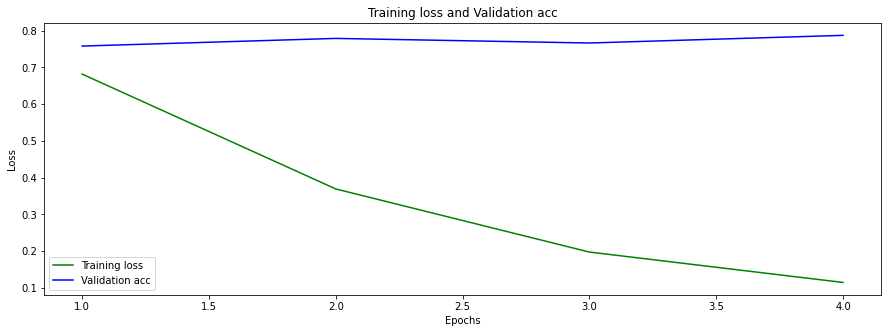

In [78]:
import matplotlib.pyplot as plt

epochs = range(1,5)
fig = plt.figure(figsize = (15, 5))
plt.plot(epochs, train_loss_values, 'g', label='Training loss')
plt.plot(epochs, test_acc_values, 'b', label='Validation acc')
plt.title('Training loss and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Maybe training wasnt too nice. Could be overfit. Lets check on validation

In [75]:
# Save models
model.save_pretrained("/content/drive/MyDrive/dmr/model/modelBERT")
tokenizer.save_pretrained("/content/drive/MyDrive/dmr/model/tokenizerBERT")
torch.save(model, '/content/drive/MyDrive/dmr/model/modelBERT.pt')

# Validation on validation data. Model never seen them!

In [76]:
indices=tokenizer.batch_encode_plus(X_val.values,
                                    max_length=512,
                                    add_special_tokens=True,
                                    return_attention_mask=True,
                                    pad_to_max_length=True,
                                    truncation=True)
input_ids1=indices["input_ids"]
attention_masks1=indices["attention_mask"]

# Convert to tensors.
prediction_inputs1= torch.tensor(input_ids1)
prediction_masks1 = torch.tensor(attention_masks1)
prediction_labels1 = torch.tensor(y_val.values)

# Set the batch size.  
batch_size = 32 

# Create the DataLoader.
prediction_data1 = TensorDataset(prediction_inputs1, prediction_masks1, prediction_labels1)
prediction_sampler1 = SequentialSampler(prediction_data1)
prediction_dataloader1 = DataLoader(prediction_data1, sampler=prediction_sampler1, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [79]:
# Prediction on validation set
test_data
test_sampler
test_dataloader
print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in test_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids1, b_input_mask1, b_labels1 = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs1 = model(b_input_ids1, token_type_ids=None, 
                      attention_mask=b_input_mask1)

  logits1 = outputs1[0]

  # Move logits and labels to CPU
  logits1 = logits1.detach().cpu().numpy()
  label_ids1 = b_labels1.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits1)
  true_labels.append(label_ids1)

print('TEST PROCESS COMPLETED.')

Predicting labels for 715 test sentences...
TEST PROCESS COMPLETED.


In [80]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

In [81]:
label2id = {
    'neutral': 1,
    'positive': 2,
    'negative': 0
}

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix
targets = ["negative", "neutral", "positive"]
print("Accuracy of BERT is:",accuracy_score(flat_true_labels, flat_predictions))
from sklearn.metrics import classification_report
print(classification_report(flat_true_labels, flat_predictions, target_names=targets))

Accuracy of BERT is: 0.786013986013986
              precision    recall  f1-score   support

    negative       0.94      0.86      0.90       197
     neutral       0.79      0.75      0.77       284
    positive       0.68      0.77      0.72       234

    accuracy                           0.79       715
   macro avg       0.80      0.79      0.80       715
weighted avg       0.80      0.79      0.79       715



### The model is not the best but I think not too bad too

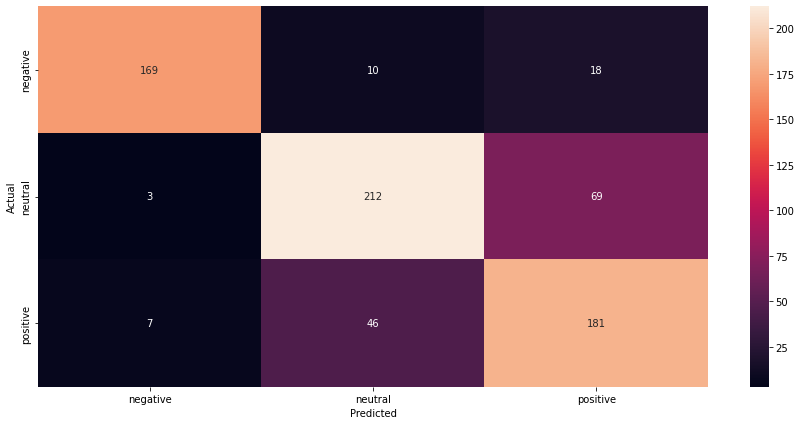

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(flat_true_labels, flat_predictions)
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=targets, yticklabels=targets)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()